In [1]:
#import pandas for data manipulation
import pandas as pd

In [2]:
#importing the data 
raw_data = pd.read_csv('E:/212data and prog analytics/Project/okcupid_profiles.csv')

In [3]:
# rows
raw_data.shape[0]

59946

In [4]:
# columns
raw_data.shape[1]

31

In [5]:
#name of the columns
raw_data.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4',
       'essay5', 'essay6', 'essay7', 'essay8', 'essay9'],
      dtype='object')

In [6]:
#import libraries needed
import string 
import datetime
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
#convert year from the last_online column to string
raw_data['year']=raw_data['last_online'].astype("string")

In [8]:
#extract year from the last_online column
raw_data['year'] = raw_data['year'].str.slice(0, 4) 

In [9]:
#checking years
print(raw_data['year'].unique())

<StringArray>
['2012', '2011']
Length: 2, dtype: string


In [10]:
#check the data
raw_data.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,year
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,2012
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN,2012
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",2012
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,2012
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN,2012


In [11]:
#counting the obaservations for year
print(raw_data.groupby('year')['age'].count())

year
2011     4699
2012    55247
Name: age, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000243052DFB00>]],
      dtype=object)

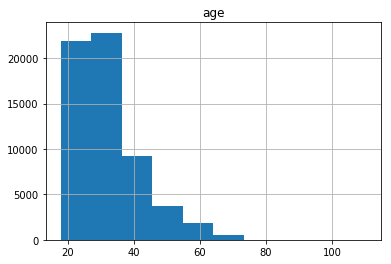

In [12]:
#distribution of age
raw_data.hist('age')

In [13]:
#dist of status
print(raw_data.status.value_counts())

single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64


In [14]:
#unique values in status
print(raw_data.status.unique())

['single' 'available' 'seeing someone' 'married' 'unknown']


In [15]:
#merge the categories in status 
raw_data['new_status']=raw_data['status'].apply(lambda x: 'single' if x == 'available' else x)
print(raw_data.new_status.value_counts())

single            57562
seeing someone     2064
married             310
unknown              10
Name: new_status, dtype: int64


In [16]:
#checking the values of the new status column
print(raw_data.new_status.value_counts())

single            57562
seeing someone     2064
married             310
unknown              10
Name: new_status, dtype: int64


In [17]:
#dist of sex column
print(raw_data.sex.value_counts())

m    35829
f    24117
Name: sex, dtype: int64


In [18]:
#dis of orientation column
print(raw_data.orientation.value_counts())

straight    51606
gay          5573
bisexual     2767
Name: orientation, dtype: int64


In [19]:
#dist of the body_type columns
print(raw_data.body_type.value_counts())

average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64


In [20]:
#categorize the body_type column
raw_data.loc[(raw_data['body_type'] == 'fit')|(raw_data['body_type'] == 'athletic')|(raw_data['body_type'] == 'jacked'), 'new_body_type'] = 'fit'  
raw_data.loc[(raw_data['body_type'] == 'rather not say')|(raw_data['body_type'] == 'average')|(raw_data['body_type'] == 'curvy')|(raw_data['body_type'] == 'a little extra') | (raw_data['body_type'] == 'full figured') | (raw_data['body_type'] == 'overweight')|(raw_data['body_type'] == 'used up'), 'new_body_type'] = 'overweight'  
raw_data.loc[(raw_data['body_type'] == 'thin')|(raw_data['body_type'] == 'skinny'), 'new_body_type'] = 'thin'
print(raw_data.new_body_type.value_counts())

fit           24951
overweight    23211
thin           6488
Name: new_body_type, dtype: int64


In [21]:
#check the data
raw_data.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay3,essay4,essay5,essay6,essay7,essay8,essay9,year,new_status,new_body_type
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,2012,single,overweight
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN,2012,single,overweight
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",2012,single,thin
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,2012,single,thin
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN,2012,single,fit


In [22]:
#check the missing vlaues
print(raw_data.isnull().sum())

age                  0
status               0
sex                  0
orientation          0
body_type         5296
diet             24395
drinks            2985
drugs            14080
education         6628
ethnicity         5680
height               3
income               0
job               8198
last_online          0
location             0
offspring        35561
pets             19921
religion         20226
sign             11056
smokes            5512
speaks              50
essay0            5488
essay1            7572
essay2            9638
essay3           11476
essay4           10537
essay5           10850
essay6           13771
essay7           12451
essay8           19225
essay9           12603
year                 0
new_status           0
new_body_type     5296
dtype: int64


In [23]:
#check the ethnicity column
print(raw_data.ethnicity.value_counts())

white                                                                                       32831
asian                                                                                        6134
hispanic / latin                                                                             2823
black                                                                                        2008
other                                                                                        1706
                                                                                            ...  
middle eastern, black, native american, hispanic / latin, white                                 1
middle eastern, pacific islander                                                                1
middle eastern, black, native american, white, other                                            1
asian, black, native american, indian, hispanic / latin, white, other                           1
asian, middle easter

In [24]:
#check the diet column
print(raw_data.diet.value_counts())

mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
halal                     11
kosher                    11
Name: diet, dtype: int64


In [25]:
#categorize the diet column
raw_data.loc[(raw_data['diet'] == 'strictly other')|(raw_data['diet'] == 'other')|(raw_data['diet'] == 'mostly other') |
(raw_data['diet'] == 'strictly anything') | (raw_data['diet'] == 'mostly anything') | (raw_data['diet'] == 'anything'),'new_diet'] = 'anything'  

raw_data.loc[(raw_data['diet'] == 'strictly halal')|(raw_data['diet'] == 'mostly halal')|(raw_data['diet'] == 'halal') 
| (raw_data['diet'] == 'strictly kosher')|(raw_data['diet'] == 'mostly kosher')|(raw_data['diet'] == 'kosher') 
,'new_diet'] = 'kosher/halal' 

raw_data.loc[(raw_data['diet'] == 'vegan')|(raw_data['diet'] == 'strictly vegan')|(raw_data['diet'] == 'mostly vegan') 
,'new_diet'] = 'vegan' 

raw_data.loc[(raw_data['diet'] == 'vegetarian')|(raw_data['diet'] == 'strictly vegetarian')|(raw_data['diet'] == 'mostly vegetarian') 
,'new_diet'] = 'vegetarian'


In [26]:
#dist of the diet column
print(raw_data.new_diet.value_counts())

anything        29671
vegetarian       4986
vegan             702
kosher/halal      192
Name: new_diet, dtype: int64


In [27]:
#dist of the drinks column
print(raw_data.drinks.value_counts())

socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64


In [28]:
#categorize the drinks column
raw_data.loc[(raw_data['drinks'] == 'socially')|(raw_data['drinks'] == 'often')|(raw_data['drinks'] == 'very often') |
(raw_data['drinks'] == 'desperately'),'new_drinks'] = 'yes'  

raw_data.loc[(raw_data['drinks'] == 'not at all')|(raw_data['drinks'] == 'rarely'),'new_drinks'] = 'no' 
print(raw_data.new_drinks.value_counts())

yes    47737
no      9224
Name: new_drinks, dtype: int64


In [29]:
#categorize the drugs column
raw_data.loc[(raw_data['drugs'] == 'sometimes')|(raw_data['drugs'] == 'often'),'new_drugs'] = 'yes'  
raw_data.loc[(raw_data['drugs'] == 'never'),'new_drugs'] = 'no'  
print(raw_data.new_drugs.value_counts())

no     37724
yes     8142
Name: new_drugs, dtype: int64


In [30]:
#check the data
raw_data.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay6,essay7,essay8,essay9,year,new_status,new_body_type,new_diet,new_drinks,new_drugs
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,2012,single,overweight,anything,yes,no
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,NaN,NaN,i am very open and will share just about anyth...,NaN,2012,single,overweight,anything,yes,yes
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",2012,single,thin,anything,yes,NaN
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,cats and german philosophy,NaN,NaN,you feel so inclined.,2012,single,thin,vegetarian,yes,NaN
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,NaN,NaN,NaN,NaN,2012,single,fit,NaN,yes,no


In [31]:
#dist of the education column
print(raw_data.education.value_counts())

graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
dropped out

In [32]:
#cateorize the education column
raw_data.loc[(raw_data['education']=='college/university') |( raw_data['education'] == 'graduated from college/university' ) |
( raw_data['education'] == 'graduated from high school' ) |( raw_data['education'] == 'graduated from law school' )
|( raw_data['education'] == 'graduated from masters program' ) |( raw_data['education'] == 'graduated from med school' ) 
|( raw_data['education'] == 'graduated from ph.d program' ) |( raw_data['education'] == 'graduated from space camp' ) |
( raw_data['education'] == 'graduated from two-year college' ) |( raw_data['education'] == 'high school' ) |
( raw_data['education'] == 'law school' ) |( raw_data['education'] == 'masters program' ) |( raw_data['education'] == 'med school' ) 
|( raw_data['education'] == 'ph.d program' ) |( raw_data['education'] == 'space camp' ) |( raw_data['education'] == 'two-year college' ),
'new_education'] = 'graduated'


raw_data.loc[( raw_data['education'] == 'dropped out of college/university' ) |( raw_data['education'] == 'dropped out of high school' ) 
|( raw_data['education'] == 'dropped out of law school' ) |( raw_data['education'] == 'dropped out of masters program' ) |
( raw_data['education'] == 'dropped out of med school' ) |( raw_data['education'] == 'dropped out of ph.d program' ) |
( raw_data['education'] == 'dropped out of space camp' ) |( raw_data['education'] == 'dropped out of two-year college' ),
'new_education']= 'dropped out'

raw_data.loc[( raw_data['education'] == 'working on college/university' ) |( raw_data['education'] == 'working on high school' )
|( raw_data['education'] == 'working on law school' ) |( raw_data['education'] == 'working on masters program' ) |
( raw_data['education'] == 'working on med school' ) |( raw_data['education'] == 'working on ph.d program' ) |
( raw_data['education'] == 'working on space camp' ) |( raw_data['education'] == 'working on two-year college' ),
'new_education']= 'studying'

print(raw_data.new_education.value_counts())




graduated      40745
studying       10465
dropped out     2108
Name: new_education, dtype: int64


In [33]:
#split the ethnicity column
raw_data['new_ethnicity_1'] = raw_data['ethnicity'].str.split(' ').str[0]

In [34]:
#check the values
print(raw_data['new_ethnicity_1'].value_counts())

white       32831
asian        6134
hispanic     4379
asian,       2071
black        2008
other        1706
indian       1077
black,       1063
middle        811
pacific       717
native        709
white,        641
indian,       119
Name: new_ethnicity_1, dtype: int64


In [35]:
#categorize the ethnicity column
raw_data.loc[(raw_data['new_ethnicity_1']=='other') |( raw_data['new_ethnicity_1'] == 'middle' ) |
( raw_data['new_ethnicity_1'] == 'pacific' ) |( raw_data['new_ethnicity_1'] == 'native' ),'new_ethnicity'] = 'other'

raw_data.loc[(raw_data['new_ethnicity_1']=='black') |( raw_data['new_ethnicity_1'] == 'black,' ),'new_ethnicity'] = 'black'

raw_data.loc[(raw_data['new_ethnicity_1']=='indian') |( raw_data['new_ethnicity_1'] == 'indian,' ),'new_ethnicity'] = 'indian'

raw_data.loc[(raw_data['new_ethnicity_1']=='asian') |( raw_data['new_ethnicity_1'] == 'asian,' ),'new_ethnicity'] = 'asian'

raw_data.loc[(raw_data['new_ethnicity_1']=='white,') |( raw_data['new_ethnicity_1'] == 'white' ),'new_ethnicity'] = 'white'

raw_data.loc[(raw_data['new_ethnicity_1']=='hispanic'),'new_ethnicity'] = 'hispanic'

print(raw_data['new_ethnicity'].value_counts())

white       33472
asian        8205
hispanic     4379
other        3943
black        3071
indian       1196
Name: new_ethnicity, dtype: int64


In [36]:
#check the data
raw_data.head(3)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay9,year,new_status,new_body_type,new_diet,new_drinks,new_drugs,new_education,new_ethnicity_1,new_ethnicity
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,you want to be swept off your feet! you are ti...,2012,single,overweight,anything,yes,no,studying,"asian,",asian
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,NaN,2012,single,overweight,anything,yes,yes,studying,white,white
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"you are bright, open, intense, silly, ironic, ...",2012,single,thin,anything,yes,NaN,graduated,NaN,NaN


In [37]:
#categorize the job column
raw_data.loc[(raw_data['job']=='executive / management') |(raw_data['job']=='sales / marketing / biz dev') |
(raw_data['job']=='construction / craftsmanship') | (raw_data['job']=='transportation') |
(raw_data['job']=='hospitality / travel') |(raw_data['job']=='banking / financial / real estate'),'new_job'] = 'business management/development'

raw_data.loc[(raw_data['job']=='computer / hardware / software') |(raw_data['job']=='science / tech / engineering')
,'new_job'] = 'technology'

raw_data.loc[(raw_data['job']=='entertainment / media') |(raw_data['job']=='artistic / musical / writer')
,'new_job'] = 'entertainment'

raw_data.loc[(raw_data['job']=='student') |(raw_data['job']=='retired') |(raw_data['job']=='unemployed'),'new_job'] = 'unemployed'

raw_data.loc[(raw_data['job']=='education / academia'),'new_job']='education'

raw_data.loc[(raw_data['job']=='medicine / health'),'new_job']='healthcare'

raw_data.loc[(raw_data['job']=='other') |(raw_data['job']=='rather not say'),'new_job'] = 'other'

raw_data.loc[(raw_data['job']=='law / legal services'),'new_job'] = 'law'

raw_data.loc[(raw_data['job']=='clerical / administrative') | (raw_data['job']=='military') |
(raw_data['job']=='political / government'), 'new_job'] = 'government'

print(raw_data['new_job'].value_counts())

business management/development    11781
technology                          9557
other                               8025
entertainment                       6689
unemployed                          5405
healthcare                          3680
education                           3513
government                          1717
law                                 1381
Name: new_job, dtype: int64


In [38]:
#check the location column ditribution
raw_data.location.value_counts

<bound method IndexOpsMixin.value_counts of 0        south san francisco, california
1                    oakland, california
2              san francisco, california
3                   berkeley, california
4              san francisco, california
                      ...               
59941                oakland, california
59942          san francisco, california
59943    south san francisco, california
59944          san francisco, california
59945          san francisco, california
Name: location, Length: 59946, dtype: object>

In [39]:
#get the state
raw_data['new_location_1'] = raw_data['location'].str.split(',').str[1]

In [40]:
#dist of the location
print(raw_data['new_location_1'].value_counts())

 california              59855
 new york                   17
 illinois                    8
 massachusetts               5
 texas                       4
 michigan                    4
 oregon                      4
 florida                     3
 arizona                     3
 district of columbia        2
 georgia                     2
 hawaii                      2
 washington                  2
 spain                       2
 colorado                    2
 utah                        2
 ohio                        2
 minnesota                   2
 united kingdom              2
 virginia                    2
 west virginia               1
 louisiana                   1
 vietnam                     1
 wisconsin                   1
 connecticut                 1
 north carolina              1
 new jersey                  1
 pennsylvania                1
 tennessee                   1
 mexico                      1
 germany                     1
 british columbia            1
 ireland

In [41]:
#dist of the speaks column
print(raw_data.speaks.value_counts())

english                                                                                        21828
english (fluently)                                                                              6628
english (fluently), spanish (poorly)                                                            2059
english (fluently), spanish (okay)                                                              1917
english (fluently), spanish (fluently)                                                          1288
                                                                                               ...  
english (fluently), khmer (okay), sign language (poorly), spanish (poorly)                         1
english (fluently), spanish (poorly), ancient greek (poorly), japanese (poorly)                    1
english (fluently), english (poorly), spanish (fluently), french (poorly), english (poorly)        1
english (fluently), czech (fluently), slovak (okay)                                        

In [42]:
#categorize the speaks column
raw_data['new_speaks'] = raw_data.speaks.apply(lambda x: 'english' if not pd.isnull(x) else x)

In [43]:
#check the missing values 
pd.isnull(raw_data['new_speaks']).sum()

50

In [44]:
#check the non null values
raw_data['new_speaks'].value_counts()

english    59896
Name: new_speaks, dtype: int64

In [45]:
#dist of the smokes column
raw_data.smokes.value_counts()

no                43896
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: smokes, dtype: int64

In [46]:
#categorise the smokes column
raw_data.loc[(raw_data['smokes'] =='sometimes') | (raw_data['smokes'] =='when drinking') | (raw_data['smokes'] =='yes') |
(raw_data['smokes'] =='trying to quit'),"new_smokes"] ='yes'

raw_data.loc[(raw_data['smokes'] =='no'),"new_smokes"] ='no'

In [47]:
#dist of the column
raw_data.new_smokes.value_counts()

no     43896
yes    10538
Name: new_smokes, dtype: int64

In [48]:
#check the missing values
pd.isnull(raw_data['new_smokes']).sum()

5512

In [49]:
#categorise the sign column
raw_data['new_sign']=raw_data['sign'].str.split(' ').str[0]

In [50]:
#dist of the column
raw_data['new_sign'].value_counts()

leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: new_sign, dtype: int64

In [51]:
#check the data
raw_data.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,new_drinks,new_drugs,new_education,new_ethnicity_1,new_ethnicity,new_job,new_location_1,new_speaks,new_smokes,new_sign
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,yes,no,studying,"asian,",asian,business management/development,california,english,yes,gemini
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,yes,yes,studying,white,white,business management/development,california,english,no,cancer
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,yes,NaN,graduated,NaN,NaN,NaN,california,english,no,pisces
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,yes,NaN,studying,white,white,unemployed,california,english,no,pisces
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,yes,no,graduated,"asian,",asian,entertainment,california,english,no,aquarius


In [52]:
#categorise the religion column
raw_data['religion'].str.split(' ').str[0].value_counts()

agnosticism     8812
other           7743
atheism         6985
christianity    5787
catholicism     4758
judaism         3098
buddhism        1948
hinduism         450
islam            139
Name: religion, dtype: int64

In [53]:
#categorise the column
raw_data['new_religion']=raw_data['religion'].str.split(' ').str[0]

In [54]:
#dist of the column
raw_data['new_religion'].value_counts()

agnosticism     8812
other           7743
atheism         6985
christianity    5787
catholicism     4758
judaism         3098
buddhism        1948
hinduism         450
islam            139
Name: new_religion, dtype: int64

In [55]:
#check the pets column
raw_data['pets'].value_counts()

likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: pets, dtype: int64

In [56]:
#categorise the offspring column
raw_data.loc[(raw_data['offspring']=='has a kid, and wants more') |(raw_data['offspring']=='has kids, and might want more')
|(raw_data['offspring']=='has a kid, and might want more') |(raw_data['offspring']=='has kids, and wants more') 
,'new_offspring']='has kids and wants more'


raw_data.loc[(raw_data['offspring']=='has a kid') |(raw_data['offspring']=='has kids'),'new_offspring']='has kids'

raw_data.loc[(raw_data['offspring']=='has kids, but doesn\'t want more') 
|(raw_data['offspring']=='has a kid, but doesn\'t want more') ,'new_offspring']='has kids but does not want more'

raw_data.loc[(raw_data['offspring']=='wants kids') |(raw_data['offspring']=='might want kids'),'new_offspring']='want kids'


raw_data.loc[(raw_data['offspring']=='doesn\'t have kids, but might want them') 
|(raw_data['offspring']=='doesn\'t have kids, but wants them') ,'new_offspring']='no kids but want them'


raw_data.loc[(raw_data['offspring']=='doesn\'t have kids') | (raw_data['offspring']=='doesn\'t want kids')
|(raw_data['offspring']=='doesn\'t have kids, and doesn\'t want any'),'new_offspring']='no kids'

raw_data['new_offspring'].value_counts()


no kids                            11619
no kids but want them               7440
has kids                            3764
has kids but does not want more      717
has kids and wants more              438
want kids                            407
Name: new_offspring, dtype: int64

In [57]:
#check for the null data
raw_data['new_offspring'].isnull().sum()

35561

In [58]:
#old and new columns created
raw_data.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4',
       'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'year', 'new_status',
       'new_body_type', 'new_diet', 'new_drinks', 'new_drugs', 'new_education',
       'new_ethnicity_1', 'new_ethnicity', 'new_job', 'new_location_1',
       'new_speaks', 'new_smokes', 'new_sign', 'new_religion',
       'new_offspring'],
      dtype='object')

In [59]:
#missing values
total_count = raw_data.isna().count()
count_na = raw_data.isna().sum().sort_values(ascending = False)
pct_na =(raw_data.isna().sum()/total_count).sort_values(ascending = False)
pd.options.display.float_format = '{:.1%}'.format
missing_data = pd.concat([count_na, pct_na], axis=1, keys=['Count', 'Percent'])
missing_data

,Count,Percent
new_offspring,35561,59.3%
offspring,35561,59.3%
new_diet,24395,40.7%
diet,24395,40.7%
religion,20226,33.7%
new_religion,20226,33.7%
pets,19921,33.2%
essay8,19225,32.1%
drugs,14080,23.5%
new_drugs,14080,23.5%


In [60]:
#removing the old columns and select the new columns created
data= raw_data[['age', 'sex', 
         'height', 'income', 'new_status',
       'new_body_type', 'new_diet', 'new_drinks', 'new_drugs', 'new_education',
        'new_ethnicity', 'new_job', 'pets',
        'new_smokes','new_offspring']]

In [61]:
#chek the columns 
data.shape[1]

15

In [62]:
#chek the rows 
data.shape[0]

59946

In [63]:
#missing values
total_count = data.isna().count()
count_na = data.isna().sum().sort_values(ascending = False)
pct_na =(data.isna().sum()/total_count).sort_values(ascending = False)
pd.options.display.float_format = '{:.1%}'.format
missing_data = pd.concat([count_na, pct_na], axis=1, keys=['Count', 'Percent'])
missing_data

,Count,Percent
new_offspring,35561,59.3%
new_diet,24395,40.7%
pets,19921,33.2%
new_drugs,14080,23.5%
new_job,8198,13.7%
new_education,6628,11.1%
new_ethnicity,5680,9.5%
new_smokes,5512,9.2%
new_body_type,5296,8.8%
new_drinks,2985,5.0%


In [64]:
#subset the data be removing the null values for the body_type
data_dt=data[data.new_body_type.notnull()]

In [65]:
#missing values
total_count = data_dt.isna().count()
count_na = data_dt.isna().sum().sort_values(ascending = False)
pct_na =(data_dt.isna().sum()/total_count).sort_values(ascending = False)
pd.options.display.float_format = '{:.1%}'.format
missing_data = pd.concat([count_na, pct_na], axis=1, keys=['Count', 'Percent'])
missing_data

,Count,Percent
new_offspring,31596,57.8%
new_diet,20622,37.7%
pets,17700,32.4%
new_drugs,12375,22.6%
new_job,6859,12.6%
new_education,5721,10.5%
new_ethnicity,4562,8.3%
new_smokes,4513,8.3%
new_drinks,2332,4.3%
new_body_type,0,0.0%


In [66]:
#subset the data be removing the null values for the new_drinks since it is less than or equal to 5%
data_dt=data_dt[data_dt.new_drinks.notnull()]

In [67]:
#missing values
total_count = data_dt.isna().count()
count_na = data_dt.isna().sum().sort_values(ascending = False)
pct_na =(data_dt.isna().sum()/total_count).sort_values(ascending = False)
pd.options.display.float_format = '{:.1%}'.format
missing_data = pd.concat([count_na, pct_na], axis=1, keys=['Count', 'Percent'])
missing_data

,Count,Percent
new_offspring,29846,57.0%
new_diet,19160,36.6%
pets,16208,31.0%
new_drugs,11364,21.7%
new_job,5829,11.1%
new_education,4828,9.2%
new_ethnicity,4093,7.8%
new_smokes,3053,5.8%
new_drinks,0,0.0%
new_body_type,0,0.0%


In [68]:
#check the rows
data_dt.shape[0]

52318

In [69]:
#checking the columns
data_dt.columns

Index(['age', 'sex', 'height', 'income', 'new_status', 'new_body_type',
       'new_diet', 'new_drinks', 'new_drugs', 'new_education', 'new_ethnicity',
       'new_job', 'pets', 'new_smokes', 'new_offspring'],
      dtype='object')

In [70]:
#creating the copy
df=data_dt

In [71]:
#dropping the columns we are not going to use for the model and these have more than 20% missing values
df=df.drop(['pets','new_offspring'],axis=1)

In [72]:
#checking the columns
df.columns

Index(['age', 'sex', 'height', 'income', 'new_status', 'new_body_type',
       'new_diet', 'new_drinks', 'new_drugs', 'new_education', 'new_ethnicity',
       'new_job', 'new_smokes'],
      dtype='object')

In [73]:
#replacing the missing values with the most occuring value
df["new_smokes"].fillna(df.new_smokes.value_counts().sort_values(ascending=False).index[0], inplace = True) 


In [74]:
#replacing the missing values with the most occuring value
df["new_diet"].fillna(df.new_diet.value_counts().sort_values(ascending=False).index[0], inplace = True) 


In [75]:
#replacing the missing values with the most occuring value
df["new_drugs"].fillna(df.new_drugs.value_counts().sort_values(ascending=False).index[0], inplace = True) 


In [76]:
#replacing the missing values with the most occuring value
df["new_ethnicity"].fillna(df.new_ethnicity.value_counts().sort_values(ascending=False).index[0], inplace = True) 


In [77]:
#replacing the missing values with the most occuring value
df["new_job"].fillna(df.new_job.value_counts().sort_values(ascending=False).index[0], inplace = True) 


In [78]:
#replacing the missing values with the most occuring value
df["new_education"].fillna(df.new_education.value_counts().sort_values(ascending=False).index[0], inplace = True) 

In [79]:
#no missing values
total_count = df.isna().count()
count_na = df.isna().sum().sort_values(ascending = False)
pct_na =(df.isna().sum()/total_count).sort_values(ascending = False)
pd.options.display.float_format = '{:.1%}'.format
missing_data = pd.concat([count_na, pct_na], axis=1, keys=['Count', 'Percent'])
# Only show columns with more than 5% missing data
missing_data

,Count,Percent
new_smokes,0,0.0%
new_job,0,0.0%
new_ethnicity,0,0.0%
new_education,0,0.0%
new_drugs,0,0.0%
new_drinks,0,0.0%
new_diet,0,0.0%
new_body_type,0,0.0%
new_status,0,0.0%
income,0,0.0%


In [80]:
df.shape[0]

52318

In [81]:
#export to R to treat the income column
df.to_csv(r'E:/212data and prog analytics/Project/data.csv', index = False)

In [82]:
#importing the data created in R
df = pd.read_csv('E:/212data and prog analytics/Project/data_rf.csv')

In [83]:
#drop the old income column
df=df.drop('income',axis=1)

In [84]:
#check the rows
df.shape[0]

52318

In [85]:
#check the columns
df.shape[1]

13

In [86]:
#check missing values in data
df.isnull().sum()

age              0
sex              0
height           0
new_status       0
new_body_type    0
new_diet         0
new_drinks       0
new_drugs        0
new_education    0
new_ethnicity    0
new_job          0
new_smokes       0
inc              0
dtype: int64

In [88]:
#Decision Tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#for train test splitting
from sklearn.model_selection import train_test_split

#for decision tree object
from sklearn.tree import DecisionTreeClassifier

#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix

#for visualizing tree 
#from sklearn.tree import plot_tree
from dtreeviz.trees import dtreeviz
import graphviz

In [89]:
df.head()

,age,sex,height,new_status,new_body_type,new_diet,new_drinks,new_drugs,new_education,new_ethnicity,new_job,new_smokes,inc
0,22,m,75,single,overweight,anything,yes,no,studying,asian,business management/development,yes,60000
1,35,m,70,single,overweight,anything,yes,yes,studying,white,business management/development,no,60000
2,38,m,68,single,thin,anything,yes,no,graduated,white,business management/development,no,60000
3,23,m,71,single,thin,vegetarian,yes,no,studying,white,unemployed,no,60000
4,29,m,66,single,fit,anything,yes,no,graduated,asian,entertainment,no,60000


In [90]:
#renaming the columns
df.columns=['age','sex','height','status','body_type','diet','drinks','drugs','education','ethnicity','job','smokes','income']

In [91]:
#checking the columns
df.columns

Index(['age', 'sex', 'height', 'status', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'job', 'smokes', 'income'],
      dtype='object')

In [106]:
#creating the target variable
target = df['body_type']
df1 = df.copy()
df1 = df1.drop('body_type', axis =1)
#df1.shape

In [107]:
#checking the rows
df1.shape[0]

52318

In [108]:
#checking the columns
df1.shape[1]

12

In [110]:
#label encoding for target variable in alphabatical order
le = LabelEncoder()
#target = le.fit_transform(target)
#target
target = le.fit_transform(target.astype('category'))

In [111]:
#assigning target to y
y = target

In [112]:
#checkingt the target variable
target

array([1, 1, 2, ..., 1, 0, 1], dtype=int64)

In [113]:
#checking the column names
df1.columns

Index(['age', 'sex', 'height', 'status', 'diet', 'drinks', 'drugs',
       'education', 'ethnicity', 'job', 'smokes', 'income'],
      dtype='object')

In [114]:
#creating one hot encoding
categorical_cols = ['sex','status','diet','drinks','drugs','education','ethnicity','job','smokes']
df1=pd.get_dummies(df1, columns=categorical_cols)

In [115]:
#checking the column names
df1.columns

Index(['age', 'height', 'income', 'sex_f', 'sex_m', 'status_married',
       'status_seeing someone', 'status_single', 'status_unknown',
       'diet_anything', 'diet_kosher/halal', 'diet_vegan', 'diet_vegetarian',
       'drinks_no', 'drinks_yes', 'drugs_no', 'drugs_yes',
       'education_dropped out', 'education_graduated', 'education_studying',
       'ethnicity_asian', 'ethnicity_black', 'ethnicity_hispanic',
       'ethnicity_indian', 'ethnicity_other', 'ethnicity_white',
       'job_business management/development', 'job_education',
       'job_entertainment', 'job_government', 'job_healthcare', 'job_law',
       'job_other', 'job_technology', 'job_unemployed', 'smokes_no',
       'smokes_yes'],
      dtype='object')

In [116]:
#checking the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52318 entries, 0 to 52317
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   age                                  52318 non-null  int64
 1   height                               52318 non-null  int64
 2   income                               52318 non-null  int64
 3   sex_f                                52318 non-null  uint8
 4   sex_m                                52318 non-null  uint8
 5   status_married                       52318 non-null  uint8
 6   status_seeing someone                52318 non-null  uint8
 7   status_single                        52318 non-null  uint8
 8   status_unknown                       52318 non-null  uint8
 9   diet_anything                        52318 non-null  uint8
 10  diet_kosher/halal                    52318 non-null  uint8
 11  diet_vegan                           52318 non-null  u

In [120]:
# Defining the attributes
X = df1

In [121]:
# Splitting the data - 80:20 ratio
from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(df1, labels, test_size=0.25)

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)

print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (41854, 37)
Testing split input-  (10464, 37)


In [122]:
#identifying the best depth for the decision tree
def decision_tree(features_train, labels_train, features_test, labels_test):
    best_accuracy = float('-inf')
    best_depth = 0
    for i in range(1, 20):
        classifier = DecisionTreeClassifier(max_depth=i, random_state=25)
        classifier.fit(features_train, labels_train)
        y_pred = classifier.predict(features_test)
        if metrics.accuracy_score(labels_test, y_pred) > best_accuracy:
            best_accuracy = metrics.accuracy_score(labels_test, y_pred)
            best_depth = i
    return "**DECISION TREE**\nBest accuracy = {best_accuracy}\nBest Depth = {best_depth}\n".format(best_accuracy=best_accuracy, best_depth=best_depth)


In [124]:
#max depth is 5 with accuracy of ~55%
from sklearn import metrics
decision_tree(X_train, y_train, X_test, y_test)

'**DECISION TREE**\nBest accuracy = 0.5476873088685015\nBest Depth = 5\n'

In [138]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
def random_forest(features_train, labels_train, features_test, labels_test):
    classifier = RandomForestClassifier(n_estimators=1000, random_state=3)
    classifier.fit(features_train, labels_train)
    y_pred = classifier.predict(features_test)
    return "**RANDOM FOREST**\nAccuracy = {}\n".format(metrics.accuracy_score(labels_test, y_pred))


In [140]:
#check the accuracy with random forest which is less than decision tree
random_forest(X_train, y_train,X_test, y_test)

'**RANDOM FOREST**\nAccuracy = 0.4969418960244648\n'

In [130]:
#KNN to check if this technique improves the accuracy
from sklearn.neighbors import KNeighborsClassifier
def k_nearest_neighbor(features_train, labels_train, features_test, labels_test):
    best_accuracy = float('-inf')
    best_neighbor_amt = 0
    for i in range(1, 100):
        classifier = KNeighborsClassifier(n_neighbors=i)
        classifier.fit(features_train, labels_train.ravel())
        y_pred = classifier.predict(features_test)
        if metrics.accuracy_score(labels_test, y_pred) > best_accuracy:
            best_accuracy = metrics.accuracy_score(labels_test, y_pred)
            best_neighbor_amt = i
    return "**K NEAREST NEIGHBOR**\nBest Accuracy = {best_accuracy}\nBest Neighbor Amt. = {best_neighbor_amt}\n".format(best_accuracy=best_accuracy,
                                                                                              best_neighbor_amt=best_neighbor_amt)


In [131]:
#check the accuracy with KNN which is less than decision tree
k_nearest_neighbor(X_train, y_train, X_test, y_test)

'**K NEAREST NEIGHBOR**\nBest Accuracy = 0.5419533639143731\nBest Neighbor Amt. = 65\n'

In [143]:
# creating the decision tree with depth of 5

dtree=DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_depth= 5)
dtree.fit(X_train,y_train)

print('Decision Tree Classifer Created')


Decision Tree Classifer Created


Classification report - 
              precision    recall  f1-score   support

          0       0.57      0.65      0.61      4832
          1       0.52      0.58      0.55      4428
          2       0.50      0.00      0.00      1204

avg / total       0.54      0.55      0.51     10464



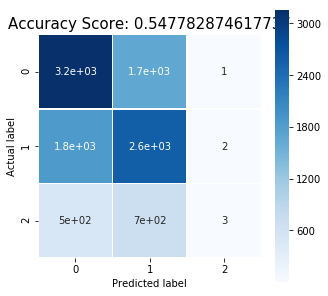

In [144]:
#running evaluation metrics
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))

sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

plt.savefig("one.png")


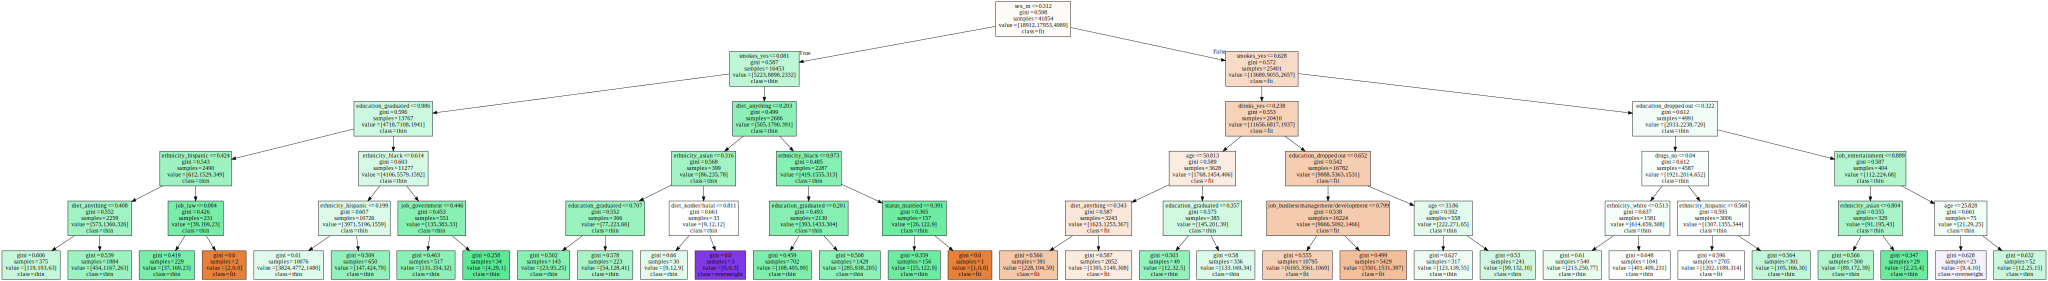

In [145]:
# Visualising the tree 
import graphviz
from sklearn import tree
#plt.figure(figsize = (20,20))
dec_tree =  tree.export_graphviz(dtree,out_file=None, feature_names = df1.columns, 
                     class_names =["fit", "thin", "overweight"] , filled = True)

graph = graphviz.Source(dec_tree, format="png") 
graph 


In [147]:
#export data for visualizations
df.to_csv(r'E:/212data and prog analytics/Project/final_data.csv', index = False)